# Project: Loan Data from Prosper
### Part 2 - Explanatory Analysis
### By Naser Shanti

## Investigation Overview
> The main goal of this study is to perform a thorough exploratory data analysis (EDA) on a loan dataset to identify significant trends, patterns, and relationships among different loan attributes. Through data visualization and analysis, we seek to understand loan performance, borrower profiles, and market dynamics. The insights gained will guide strategic decisions, risk evaluations, and the creation of specialized loan products.
 


## Dataset Overview and Executive Summary
> This dataset contains the customer's data from a loan company known as Prosper. This dataset comprises of 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("LoanDataCleaned.csv")
df

,Unnamed: 0,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
1,3,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
2,4,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
3,5,2013-12-14 08:26:37.093,60,Current,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4,6,2013-04-12 09:52:56.147,36,Current,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75481,113932,2013-04-14 05:55:02.663,36,Current,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
75482,113933,2011-11-03 20:42:55.333,36,FinalPaymentInProgress,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
75483,113934,2013-12-13 05:49:12.703,60,Current,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
75484,113935,2011-11-14 13:18:26.597,60,Completed,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


## What are the distribution of the Listing Category?

In [3]:
# Lets Define a mapping dictionary for the Listing Category in order to visualize it
category_mapping = {
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby & Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'
}

In [4]:
category_names = df['ListingCategory (numeric)'].map(category_mapping)
category_names

0          Home Improvement
1                Motorcycle
2          Home Improvement
3        Debt Consolidation
4        Debt Consolidation
                ...        
75481    Debt Consolidation
75482                 Other
75483    Debt Consolidation
75484      Home Improvement
75485    Debt Consolidation
Name: ListingCategory (numeric), Length: 75486, dtype: object

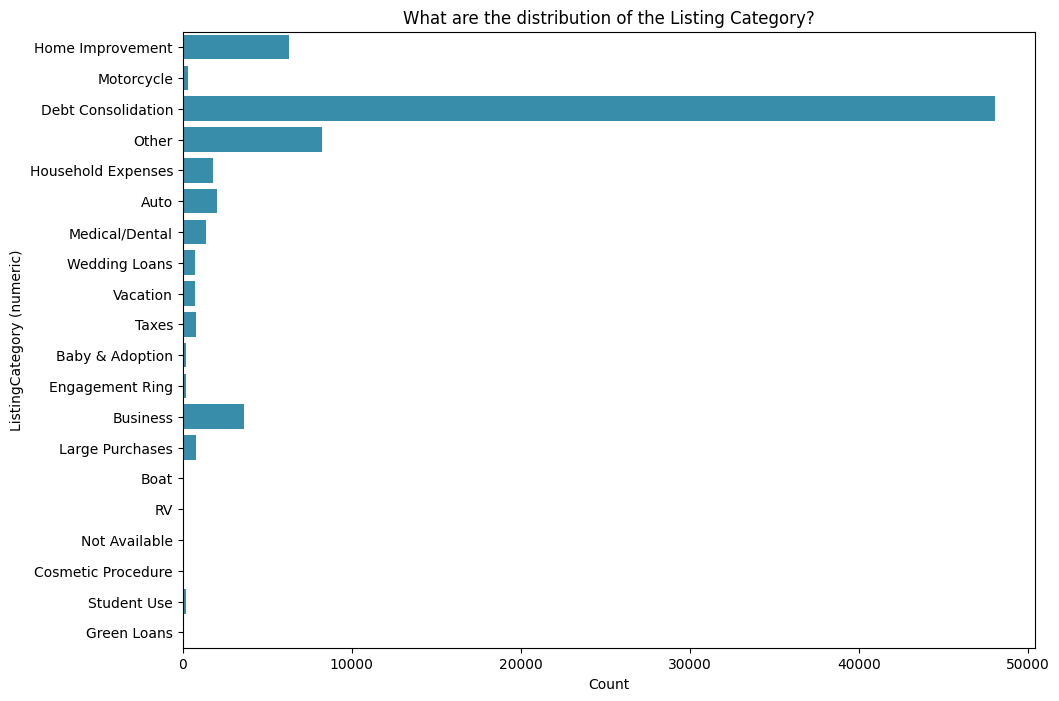

In [5]:
plt.figure(figsize=[ 11,8])
sns.countplot(y=category_names, color='#2596be')
plt.xlabel('Count')
plt.title('What are the distribution of the Listing Category?');

> **It seems that the Debt Consolidation among the the Listing Category is the highest one**

## What is the distribution of the Loan Original Amount?

In [6]:
credit_borrower_columns = [ 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'ProsperRating (numeric)',
    'ProsperRating (Alpha)','ProsperScore','IncomeRange','EmploymentStatus','IsBorrowerHomeowner',
    'BorrowerAPR', 'LoanOriginalAmount']

credit_borrower_df = df[credit_borrower_columns]
credit_borrower_df.head()

,CreditScoreRangeLower,CreditScoreRangeUpper,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,IncomeRange,EmploymentStatus,IsBorrowerHomeowner,BorrowerAPR,LoanOriginalAmount
0,680.0,699.0,6.0,A,7.0,"$50,000-74,999",Employed,False,0.12016,10000
1,800.0,819.0,6.0,A,9.0,"$25,000-49,999",Employed,True,0.12528,10000
2,680.0,699.0,3.0,D,4.0,"$100,000+",Employed,True,0.24614,15000
3,740.0,759.0,5.0,B,10.0,"$100,000+",Employed,True,0.15425,15000
4,680.0,699.0,2.0,E,2.0,"$25,000-49,999",Employed,False,0.31032,3000


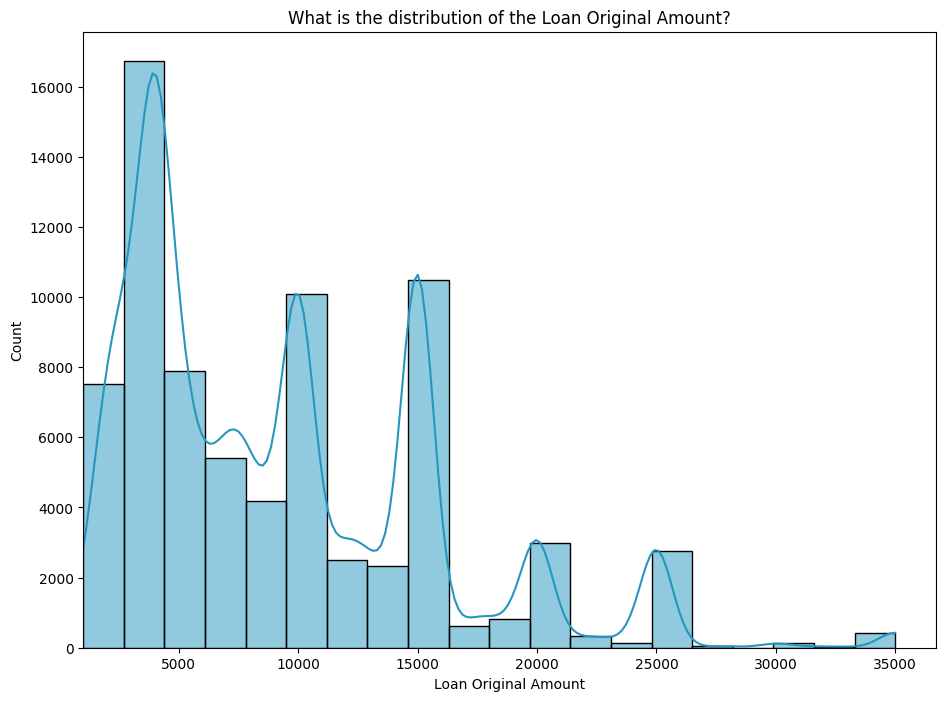

In [7]:
plt.figure(figsize=[ 11,8])
sns.histplot(data= credit_borrower_df,  x = 'LoanOriginalAmount', bins=20, kde= True, color = '#2596be')
plt.title('What is the distribution of the Loan Original Amount?')
plt.ylabel('Count')
plt.xlim(1000)
plt.xlabel('Loan Original Amount');

> **The loan amounts are mostly small and have a right-skewed distribution with a few large loans standing out. This suggests there are different groups of borrowers. Even though there are some large, less common loans, they are valid and don’t need any special treatment.**

## Which states have the highest and lowest loan amounts borrowed by borrowers?

In [8]:
location_population_columns = [
    'BorrowerState', 'Occupation', 'EmploymentStatus', 'IncomeRange',
    'IsBorrowerHomeowner', 'LoanOriginalAmount', 'ProsperRating (Alpha)', 'CreditScoreRangeLower',
    'CreditScoreRangeUpper'
]

location_population_df = df[location_population_columns]
print(location_population_df.shape)
location_population_df.head()

(75486, 9)


,BorrowerState,Occupation,EmploymentStatus,IncomeRange,IsBorrowerHomeowner,LoanOriginalAmount,ProsperRating (Alpha),CreditScoreRangeLower,CreditScoreRangeUpper
0,CO,Professional,Employed,"$50,000-74,999",False,10000,A,680.0,699.0
1,GA,Skilled Labor,Employed,"$25,000-49,999",True,10000,A,800.0,819.0
2,MN,Executive,Employed,"$100,000+",True,15000,D,680.0,699.0
3,NM,Professional,Employed,"$100,000+",True,15000,B,740.0,759.0
4,KS,Sales - Retail,Employed,"$25,000-49,999",False,3000,E,680.0,699.0


In [9]:
borrower_states_counts = location_population_df['BorrowerState'].value_counts()

# Identify states with the minimum and maximum counts
min_count_state = borrower_states_counts.idxmin()
max_count_state = borrower_states_counts.idxmax()
min_count_value = borrower_states_counts.min()
max_count_value = borrower_states_counts.max()

# Create a DataFrame with only the min and max count states
min_max_states_df = pd.DataFrame({
    'State': [min_count_state, max_count_state],
    'Count': [min_count_value, max_count_value]
})

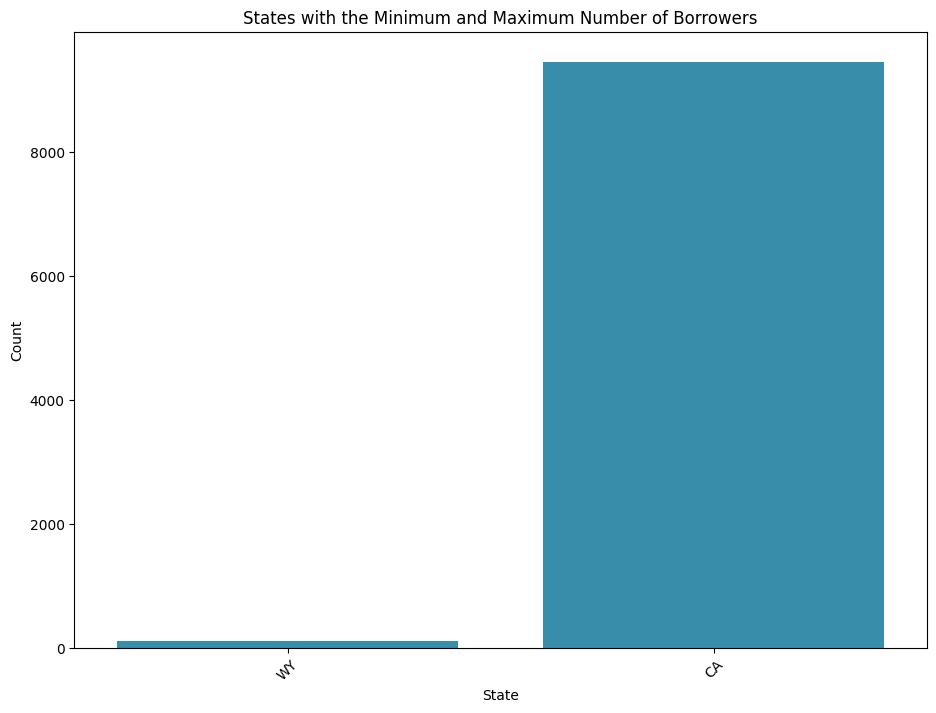

In [10]:
plt.figure(figsize=[ 11,8])
ax = sns.barplot(x='State', y='Count', data=min_max_states_df, color='#2596be')
plt.title('States with the Minimum and Maximum Number of Borrowers')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

> **From the previous graph, we can see that California (CA) has the highest number of borrowers, while Wyoming (WY) has the lowest number.**

## Does employment status affect the Credit Score Range?

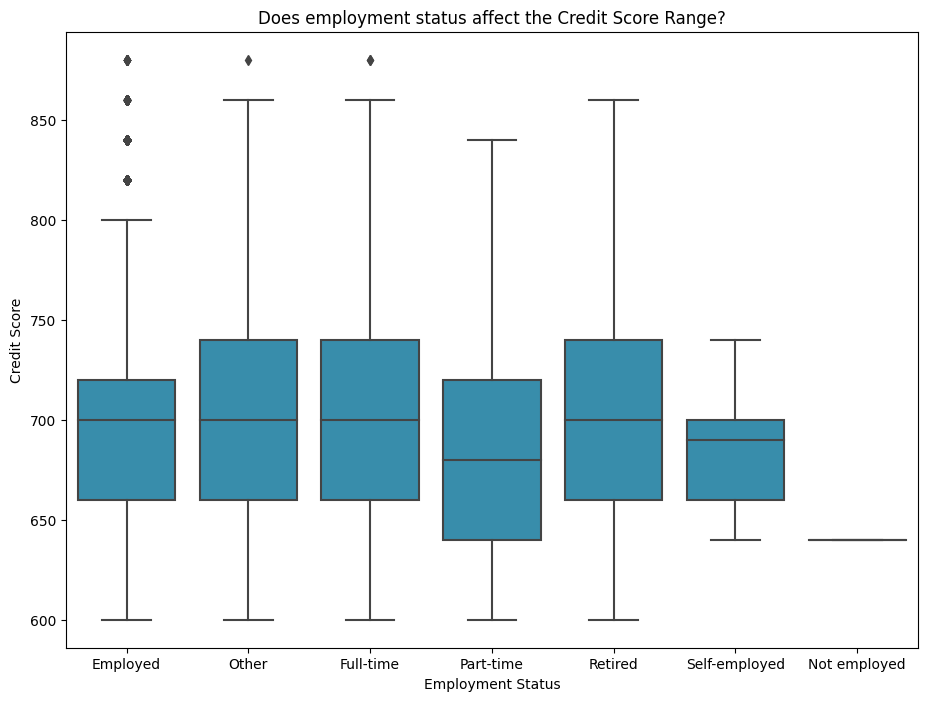

In [11]:
plt.figure(figsize=[ 11,8])
sns.boxplot(data=credit_borrower_df, x='EmploymentStatus', y='CreditScoreRangeLower', color='#2596be')
plt.title('Does employment status affect the Credit Score Range?')
plt.xlabel('Employment Status')
plt.ylabel('Credit Score');

> **Employed borrowers exhibit a broad range of credit scores, including some high outliers, which suggests that while most have moderate to high credit scores, a few have exceptionally high ones. Borrowers categorized as "Other" and "Full-time" generally have higher credit scores compared to employed borrowers, with similar distributions and some notable high outliers, indicating that some within these groups possess excellent credit. On the other hand, self-employed borrowers tend to have lower credit scores, characterized by a narrower range and fewer outliers. Not employed borrowers show the lowest and least variable credit scores, pointing to potential financial instability or limited credit history.**

## How does the number of investors relate to the loan amount?

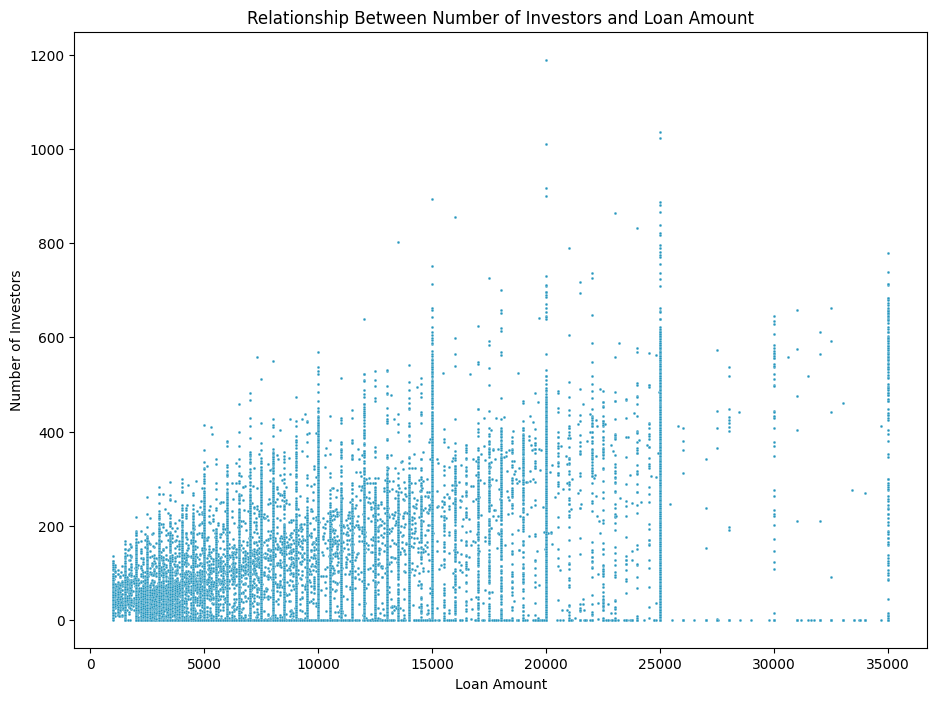

In [12]:
plt.figure(figsize=[ 11,8])
sns.scatterplot(data=df, x='LoanOriginalAmount', y='Investors', s = 4, color='#2596be')
plt.title('Relationship Between Number of Investors and Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Number of Investors')
plt.show()

> **There is a positive correlation between the number of investors and the Loan Amount, with a correlation  of 0.32 This indicates that as the number of investors increases, the loan amount also tend to increase.**

> **Some outliers are observed, with loans having over 600 investors and Loan amount exceeding 25000.**

## What is the relationship between different credit-related features and the loan amount?

In [13]:
credit_features = [
    'CreditScoreRangeLower', 'CreditScoreRangeUpper',
    'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'DebtToIncomeRatio',
    'LoanOriginalAmount'
]


credit_features_df = df[credit_features]

correlation_matrix = credit_features_df.corr()

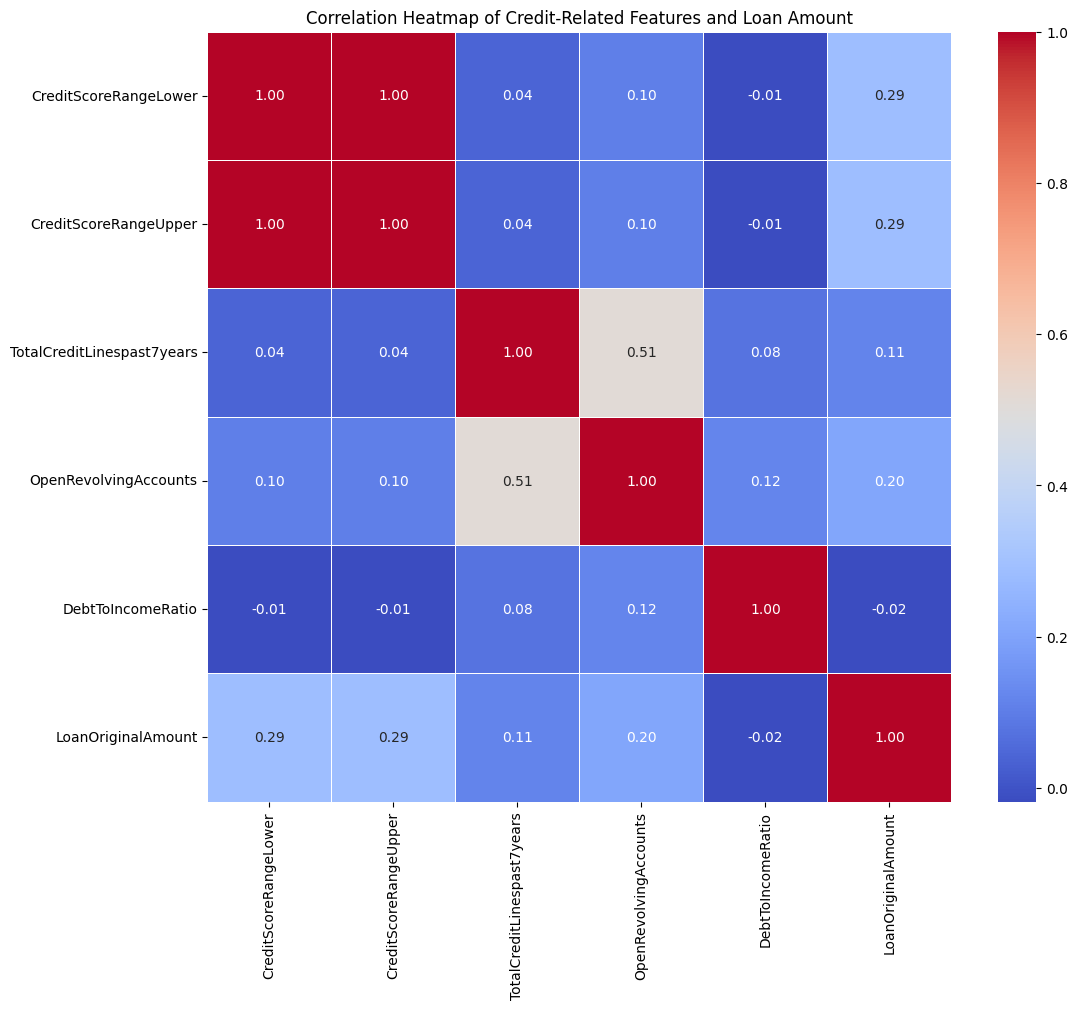

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Credit-Related Features and Loan Amount')
plt.show()

## How does the original loan amount vary across different income ranges and loan statuses?

In [15]:
df['IncomeRange'].unique()

array(['$50,000-74,999', '$25,000-49,999', '$100,000+', '$75,000-99,999',
       '$1-24,999', 'Not employed'], dtype=object)

In [16]:
income_range_order = ['Not employed','$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999'
                      , '$100,000+']

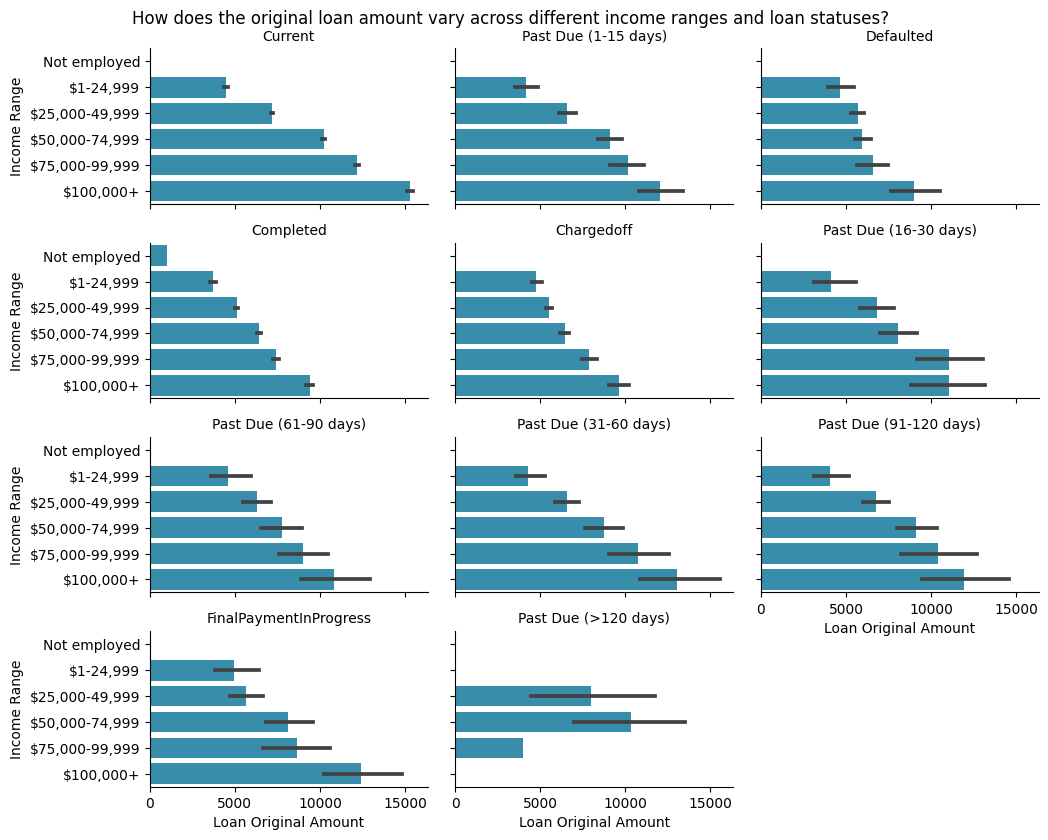

In [17]:
## Facet Plotting three variables SimplifiedLoanStatus, LoanOriginalAmount and IncomeRange
grid = sns.FacetGrid(data = df, col = 'LoanStatus', col_wrap = 3)
grid.map(sns.barplot, 'LoanOriginalAmount', 'IncomeRange', color = '#2596be', order = income_range_order)
grid.set_titles("{col_name}")
grid.set_axis_labels('Loan Original Amount', 'Income Range')
plt.suptitle('How does the original loan amount vary across different income ranges and loan statuses?', y=1.02)
grid.figure.set_size_inches(11, 8);

> **People with higher incomes tend to borrow more money. This is shown by the taller bars for higher income groups. However, the biggest loans are not always taken by the richest people. It might be because people with higher incomes are less likely to default on their loans. We should look into this further. In general, people with incomes over $100,000 borrow the most, no matter if they’ve paid back their loan or not.**

## How do loan amount, monthly payment, and credit score vary across different borrower states and employment statuses?

In [18]:
df['LoanOriginalAmount_int'] = (df['LoanOriginalAmount']//10**4)*10**4

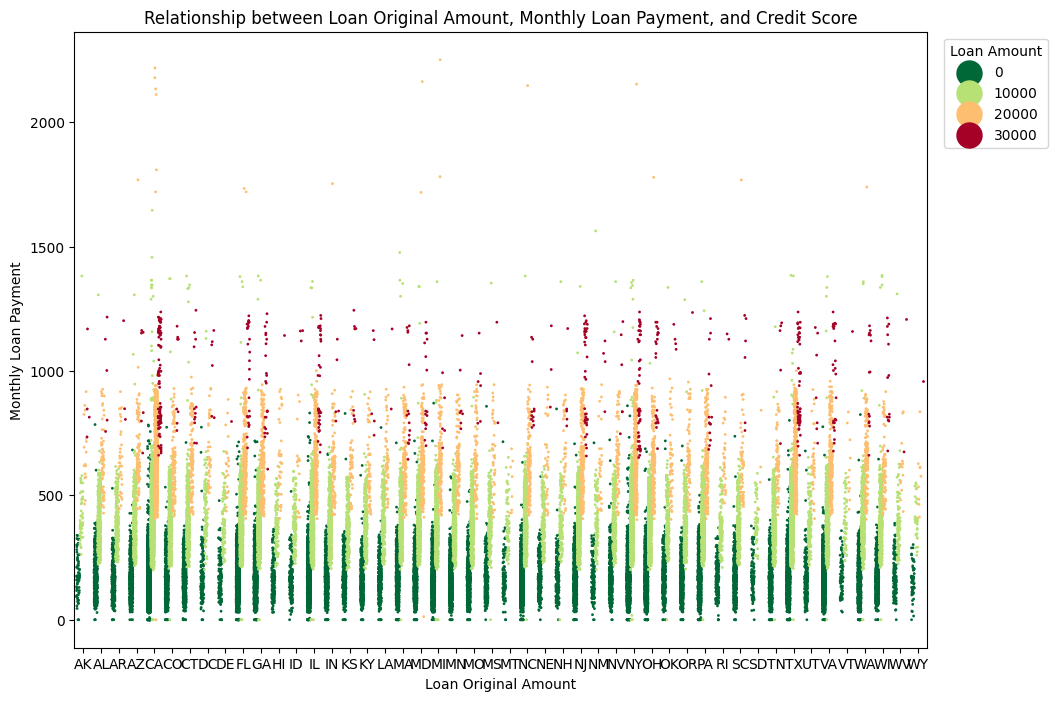

In [19]:
plt.figure(figsize=[ 11,8])
sns.stripplot(data=df, x='BorrowerState', y='MonthlyLoanPayment', hue='LoanOriginalAmount_int',
              order = sorted(df['BorrowerState'].unique()),
              palette='RdYlGn_r', size = 2, jitter=0.35, dodge=True)

plt.title('Relationship between Loan Original Amount, Monthly Loan Payment, and Credit Score')
plt.xlabel('Loan Original Amount')
plt.ylabel('Monthly Loan Payment')
plt.legend(title='Loan Amount', loc='upper right', bbox_to_anchor=(1.15, 1), markerscale=3)
plt.show()

In [20]:
!python -m nbconvert --to html Part_II_explanatory_template.ipynb

[NbConvertApp] Converting notebook Part_II_explanatory_template.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 1229309 bytes to Part_II_explanatory_template.html
